Arbol de Decisiones  - Desgaste Laboral

Importar librerias necesarias.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

Set de datos a utilizar

In [ ]:
DATA_PATH = "DataTransformada.csv"
df = pd.read_csv(DATA_PATH, sep=",")
df

,Attrition,Age,DailyRate,DistanceFromHome,Education,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurr4
0,Yes,41,1102,1,2,1,3,2,8,4,5993,11,3,8,0,1,6,4,0,5
1,No,49,279,8,1,2,2,2,7,2,5130,23,4,10,3,3,10,7,1,7
2,Yes,37,1373,2,2,2,2,1,3,3,2090,15,3,7,3,3,0,0,0,0
3,No,33,1392,3,4,1,3,1,7,3,2909,11,3,8,3,3,8,7,3,0
4,No,27,591,2,1,2,3,1,3,2,3468,12,3,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,36,884,23,2,2,4,2,3,4,2571,17,3,17,3,3,5,2,0,3
1466,No,39,613,6,1,2,2,3,1,1,9991,15,3,9,5,3,7,7,1,7
1467,No,27,155,4,3,2,4,2,5,2,6142,20,4,6,0,3,6,2,0,3
1468,No,49,1023,2,3,2,2,2,8,2,5390,14,3,17,3,2,9,6,0,8


Mostrar los primeros cinco

In [ ]:
df.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurr4
0,Yes,41,1102,1,2,1,3,2,8,4,5993,11,3,8,0,1,6,4,0,5
1,No,49,279,8,1,2,2,2,7,2,5130,23,4,10,3,3,10,7,1,7
2,Yes,37,1373,2,2,2,2,1,3,3,2090,15,3,7,3,3,0,0,0,0
3,No,33,1392,3,4,1,3,1,7,3,2909,11,3,8,3,3,8,7,3,0
4,No,27,591,2,1,2,3,1,3,2,3468,12,3,6,3,3,2,2,2,2


Caracteristicas de la estructura de la tabla o dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Attrition                1470 non-null   object
 1   Age                      1470 non-null   int64 
 2   DailyRate                1470 non-null   int64 
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   Gender                   1470 non-null   int64 
 6   JobInvolvement           1470 non-null   int64 
 7   JobLevel                 1470 non-null   int64 
 8   JobRole                  1470 non-null   int64 
 9   JobSatisfaction          1470 non-null   int64 
 10  MonthlyIncome            1470 non-null   int64 
 11  PercentSalaryHike        1470 non-null   int64 
 12  PerformanceRating        1470 non-null   int64 
 13  TotalWorkingYears        1470 non-null   int64 
 14  TrainingTimesLastYear    1470 non-null  

Division del dataset en X para los datos de entrenamiento y Y los datos de testeo

In [ ]:
X = df.iloc[:,1:25]
Y = df.iloc[:,0]

X.head()

,Age,DailyRate,DistanceFromHome,Education,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurr4
0,41,1102,1,2,1,3,2,8,4,5993,11,3,8,0,1,6,4,0,5
1,49,279,8,1,2,2,2,7,2,5130,23,4,10,3,3,10,7,1,7
2,37,1373,2,2,2,2,1,3,3,2090,15,3,7,3,3,0,0,0,0
3,33,1392,3,4,1,3,1,7,3,2909,11,3,8,3,3,8,7,3,0
4,27,591,2,1,2,3,1,3,2,3468,12,3,6,3,3,2,2,2,2


Dividir los datos dentro del entrenamiento y testeo:

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

Mostramos la estructura de la tabla que contien los datos de entrenamiento

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 721 to 165
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1029 non-null   int64
 1   DailyRate                1029 non-null   int64
 2   DistanceFromHome         1029 non-null   int64
 3   Education                1029 non-null   int64
 4   Gender                   1029 non-null   int64
 5   JobInvolvement           1029 non-null   int64
 6   JobLevel                 1029 non-null   int64
 7   JobRole                  1029 non-null   int64
 8   JobSatisfaction          1029 non-null   int64
 9   MonthlyIncome            1029 non-null   int64
 10  PercentSalaryHike        1029 non-null   int64
 11  PerformanceRating        1029 non-null   int64
 12  TotalWorkingYears        1029 non-null   int64
 13  TrainingTimesLastYear    1029 non-null   int64
 14  WorkLifeBalance          1029 non-null   int64
 15  YearsAtC

# *Entrenamiento y Predicción*

Crear el modelo

In [ ]:

from sklearn.tree import DecisionTreeClassifier                                            # import the classifier

classifier =DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=5)     # create a classifier object
classifier.fit(X_train, y_train)                                                           # fit the classifier with X and Y data or

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=100)

Predecir la respuesta para dataset de prueba

In [ ]:

y_pred= classifier.predict(X_test)

Evaluar la frecuencia con la que se ejecuta la clasificación correctametne
Modelo de Accuracy.

In [ ]:

from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8390022675736961


Comparar los datos de prueba versus los datos predecidos

In [ ]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_p

,Actual,Predicted
852,No,No
376,No,No
1342,No,No
0,Yes,No
817,No,No
...,...,...
566,Yes,No
756,No,No
130,No,No
301,No,Yes


Evaluar el Algoritmo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[364   9]
 [ 62   6]]
              precision    recall  f1-score   support

          No       0.85      0.98      0.91       373
         Yes       0.40      0.09      0.14        68

    accuracy                           0.84       441
   macro avg       0.63      0.53      0.53       441
weighted avg       0.78      0.84      0.79       441



Generar el Arbol de Decisión

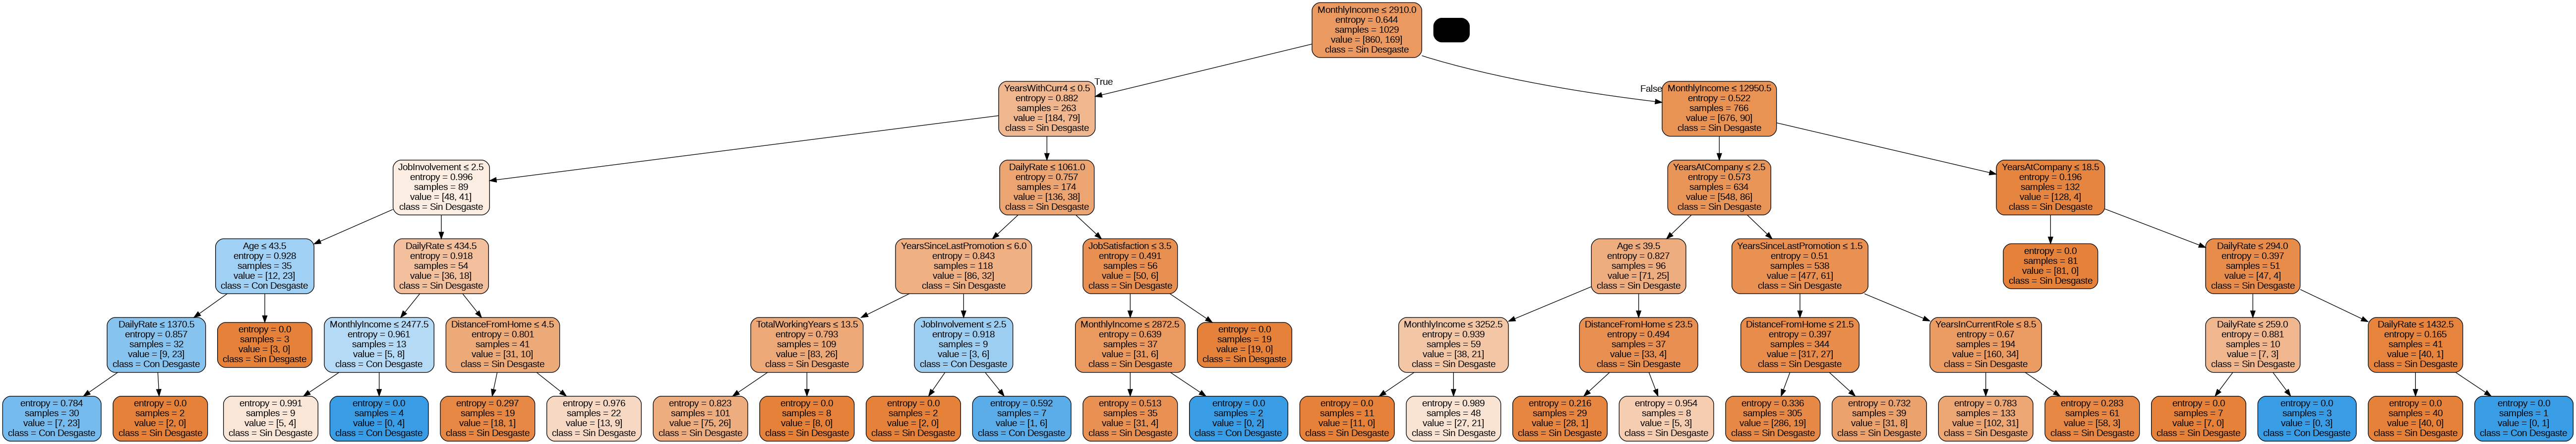

In [ ]:
import graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =list(X.columns.values),class_names=['Sin Desgaste','Con Desgaste'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DesgasteLaboral.png')
Image(graph.create_png())